## 4η εργασία: Κατηγοριοποίηση (Classification) - Υλοποίηση με scikit-learn

In [ ]:
# Εισαγωγή των απαραίτητων Python modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
adult = pd.read_csv("adult-preproc.csv") # φόρτωση προεπεξεργασμένου dataset

In [ ]:
adult.head() # προβολή 5 πρώτων εγγραφών

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,income,pc1,pc2,pc3,pc4,pc5,pc6
0,0,1,0.044131,1,0.800000,4,0,1,4,1,...,0.0,0.397959,1,0,-6.848344,-0.433473,-1.996678,0.837300,1.171393,-0.540851
1,0,2,0.048052,1,0.800000,2,3,0,4,1,...,0.0,0.122449,1,0,-3.816090,-2.215817,-0.949871,0.090739,1.753270,0.053478
2,0,0,0.137581,2,0.533333,0,5,1,4,1,...,0.0,0.397959,1,0,-2.028528,-2.174296,0.671679,-1.700603,-0.475077,0.005465
3,0,0,0.150486,5,0.400000,2,5,0,2,1,...,0.0,0.397959,1,0,-2.021243,-0.588304,2.583828,0.977770,-0.324890,-1.621727
4,2,0,0.220635,1,0.800000,2,10,5,2,0,...,0.0,0.397959,0,0,3.021028,2.081317,-1.688269,-3.133711,-0.978369,0.017562


In [ ]:
X = adult.drop(columns=["income", "pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]) # τα χαρακτηριστικά
y = adult["income"] # η μεταβλητή στόχος

In [ ]:
# Διαχωρισμός του dataset σε σύνολο εκπαίδευσης (80%) και σύνολο ελέγχου (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Ταξινομητής **Random Forest**

In [ ]:
# Εκπαίδευση ταξινομητή Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Προβλέψεις στο σύνολο εκπαίδευσης και σύνολο ελέγχου
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο εκπαίδευσης
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο ελέγχου
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

In [ ]:
# Εμφάνιση αποτελεσμάτων
print("Αξιολόγηση Συνόλου Εκπαίδευσης:")
print(f"Accuracy: {accuracy_train:.2f}, Precision: {precision_train:.2f}, Recall: {recall_train:.2f}")

print("\nΑξιολόγηση Συνόλου Ελέγχου:")
print(f"Accuracy: {accuracy_test:.2f}, Precision: {precision_test:.2f}, Recall: {recall_test:.2f}")

Αξιολόγηση Συνόλου Εκπαίδευσης:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Αξιολόγηση Συνόλου Ελέγχου:
Accuracy: 0.85, Precision: 0.72, Recall: 0.62


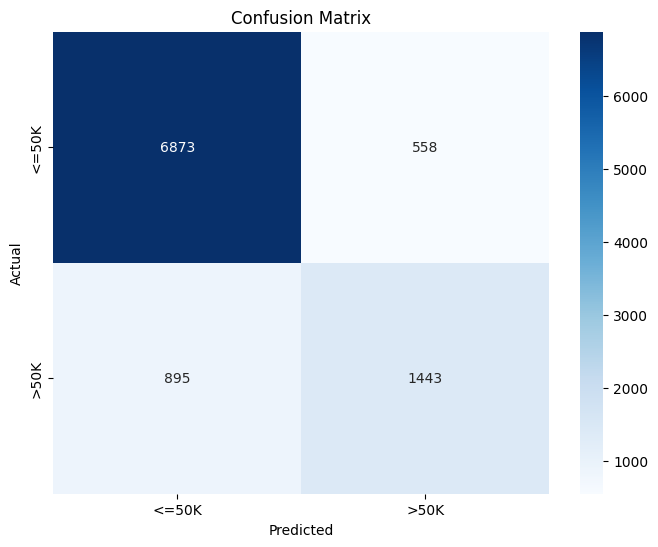

In [ ]:
# Πίνακας σύγχυσης
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Αναφορά ταξινόμησης
print(classification_report(y_test, y_test_pred, target_names=["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7431
        >50K       0.72      0.62      0.67      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



Προχωράμε στη βελτιστοποίηση των παραμέτρων του Random Forest

In [ ]:
rf = RandomForestClassifier()

# λεξικό παραμέτρων
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", verbose=2) # αρχικοποίηση GridSearchCV
model_grid = grid.fit(X_train, y_train)

print("Οι καλύτερες παράμετροι είναι:", model_grid.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   5.3s
[CV] END max_depth=None, min_samples_le

In [ ]:
# Εκπαίδευση ταξινομητή Random Forest με τις βέλτιστες παραμέτρους
rfc = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=4) # με τις βέλτιστες παραμέτρους
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200)

In [ ]:
# Προβλέψεις στο σύνολο εκπαίδευσης και σύνολο ελέγχου
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο εκπαίδευσης
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο ελέγχου
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

In [ ]:
# Εμφάνιση αποτελεσμάτων
print("Αξιολόγηση Συνόλου Εκπαίδευσης:")
print(f"Accuracy: {accuracy_train:.2f}, Precision: {precision_train:.2f}, Recall: {recall_train:.2f}")

print("\nΑξιολόγηση Συνόλου Ελέγχου:")
print(f"Accuracy: {accuracy_test:.2f}, Precision: {precision_test:.2f}, Recall: {recall_test:.2f}")

Αξιολόγηση Συνόλου Εκπαίδευσης:
Accuracy: 0.89, Precision: 0.83, Recall: 0.66

Αξιολόγηση Συνόλου Ελέγχου:
Accuracy: 0.87, Precision: 0.78, Recall: 0.61


### Ταξινομητής **K-Nearest Neighbors (KNN)**

In [ ]:
# Εκπαίδευση ταξινομητή KNN
model_clf = KNeighborsClassifier()
model_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Προβλέψεις στο σύνολο εκπαίδευσης και σύνολο ελέγχου
y_train_pred = model_clf.predict(X_train)
y_test_pred = model_clf.predict(X_test)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο εκπαίδευσης
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο ελέγχου
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

In [ ]:
# Εμφάνιση αποτελεσμάτων
print("Αξιολόγηση Συνόλου Εκπαίδευσης:")
print(f"Accuracy: {accuracy_train:.2f}, Precision: {precision_train:.2f}, Recall: {recall_train:.2f}")

print("\nΑξιολόγηση Συνόλου Ελέγχου:")
print(f"Accuracy: {accuracy_test:.2f}, Precision: {precision_test:.2f}, Recall: {recall_test:.2f}")

Αξιολόγηση Συνόλου Εκπαίδευσης:
Accuracy: 0.87, Precision: 0.78, Recall: 0.66

Αξιολόγηση Συνόλου Ελέγχου:
Accuracy: 0.83, Precision: 0.67, Recall: 0.55


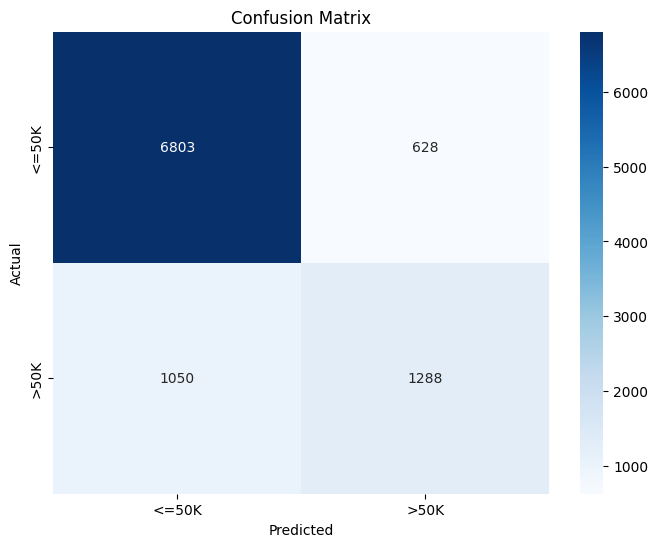

In [ ]:
# Πίνακας σύγχυσης
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Αναφορά ταξινόμησης
print(classification_report(y_test, y_test_pred, target_names=["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7431
        >50K       0.67      0.55      0.61      2338

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



Προχωράμε στη βελτιστοποίηση της παραμέτρου n_neighbors

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [10, 15, 20, 25, 30, 35, 40, 50]
}

In [ ]:
grid = GridSearchCV(knn, param_grid, scoring="accuracy", verbose=2) # αρχικοποίηση GridSearchCV
model_grid = grid.fit(X_train, y_train)

print("Οι καλύτερες παράμετροι είναι:", model_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.9s
[CV] END .....................................n_neighbors=15; total time=   0.9s
[CV] END .....................................n_neighbors=15; total time=   0.6s
[CV] END .....................................n_neighbors=15; total time=   0.7s
[CV] END .....................................n_neighbors=15; total time=   0.6s
[CV] END .....................................n_neighbors=15; total time=   0.6s
[CV] END .....................................n_neighbors=20; total time=   0.6s
[CV] END .....................................n_n

In [ ]:
# Εκπαίδευση ταξινομητή KNN με τις βέλτιστες παραμέτρους
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [ ]:
# Προβλέψεις στο σύνολο εκπαίδευσης και σύνολο ελέγχου
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο εκπαίδευσης
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

In [ ]:
# Στατιστικοί δείκτες στο σύνολο ελέγχου
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

In [ ]:
# Εμφάνιση αποτελεσμάτων
print("Αξιολόγηση Συνόλου Εκπαίδευσης:")
print(f"Accuracy: {accuracy_train:.2f}, Precision: {precision_train:.2f}, Recall: {recall_train:.2f}")

print("\nΑξιολόγηση Συνόλου Ελέγχου:")
print(f"Accuracy: {accuracy_test:.2f}, Precision: {precision_test:.2f}, Recall: {recall_test:.2f}")

Αξιολόγηση Συνόλου Εκπαίδευσης:
Accuracy: 0.84, Precision: 0.73, Recall: 0.54

Αξιολόγηση Συνόλου Ελέγχου:
Accuracy: 0.84, Precision: 0.73, Recall: 0.52
